In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\TharunMahendra\OneDrive\Desktop\NIT\DataSets\Inc_Exp_Data.csv")

In [3]:
df.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


In [4]:
df.shape

(50, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Mthly_HH_Income           50 non-null     int64 
 1   Mthly_HH_Expense          50 non-null     int64 
 2   No_of_Fly_Members         50 non-null     int64 
 3   Emi_or_Rent_Amt           50 non-null     int64 
 4   Annual_HH_Income          50 non-null     int64 
 5   Highest_Qualified_Member  50 non-null     object
 6   No_of_Earning_Members     50 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.9+ KB


### describe()
-      Generate descriptive statistics.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Mthly_HH_Income,50.0,41558.00,26097.908979,5000.0,23550.0,35000.0,50375.0,100000.0
Mthly_HH_Expense,50.0,18818.00,12090.216824,2000.0,10000.0,15500.0,25000.0,50000.0
No_of_Fly_Members,50.0,4.06,1.517382,1.0,3.0,4.0,5.0,7.0
Emi_or_Rent_Amt,50.0,3060.00,6241.434948,0.0,0.0,0.0,3500.0,35000.0
Annual_HH_Income,50.0,490019.04,320135.792123,64200.0,258750.0,447420.0,594720.0,1404000.0
No_of_Earning_Members,50.0,1.46,0.734291,1.0,1.0,1.0,2.0,4.0


In [7]:
df.isna().any()

Mthly_HH_Income             False
Mthly_HH_Expense            False
No_of_Fly_Members           False
Emi_or_Rent_Amt             False
Annual_HH_Income            False
Highest_Qualified_Member    False
No_of_Earning_Members       False
dtype: bool

### mean(),median(),mode()

In [8]:
df['Mthly_HH_Income'].mean()

41558.0

In [9]:
df['Mthly_HH_Expense'].mean()

18818.0

In [10]:
df['Mthly_HH_Expense'].median()

15500.0

In [11]:
df['Mthly_HH_Income'].median()

35000.0

In [12]:
df['Mthly_HH_Expense'].mode()

0    25000
Name: Mthly_HH_Expense, dtype: int64

In [13]:
df['Mthly_HH_Income'].mode()

0    45000
Name: Mthly_HH_Income, dtype: int64

### Monthly income and expenses for most of households 

In [14]:
monthly_exp=pd.crosstab(index=df['Mthly_HH_Income'],columns='No.Of.Count')
monthly_exp.reset_index(inplace=True)
monthly_exp[monthly_exp['No.Of.Count']==df.Mthly_HH_Income.value_counts().max()]

col_0,Mthly_HH_Income,No.Of.Count
23,45000,4


In [15]:
monthly_exp=pd.crosstab(index=df['Mthly_HH_Expense'],columns='No.Of.Count')
monthly_exp.reset_index(inplace=True)
monthly_exp[monthly_exp['No.Of.Count']==df.Mthly_HH_Expense.value_counts().max()]

col_0,Mthly_HH_Expense,No.Of.Count
18,25000,8


### Plots

In [16]:
df['Highest_Qualified_Member'].value_counts()

Highest_Qualified_Member
Graduate          19
Under-Graduate    10
Professional      10
Post-Graduate      6
Illiterate         5
Name: count, dtype: int64

<Axes: xlabel='Highest_Qualified_Member'>

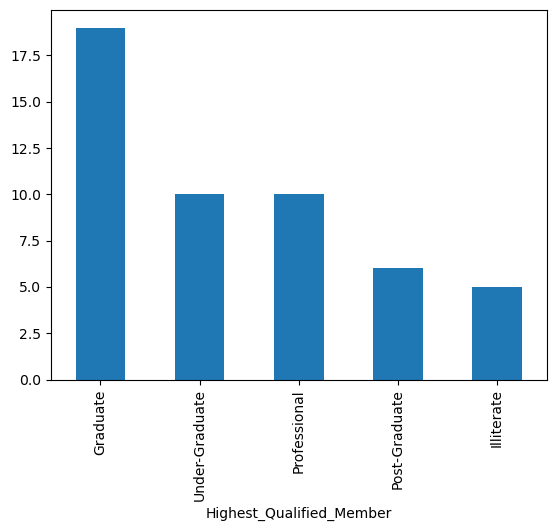

In [17]:
df['Highest_Qualified_Member'].value_counts().plot(kind='bar')

<Axes: xlabel='Mthly_HH_Income'>

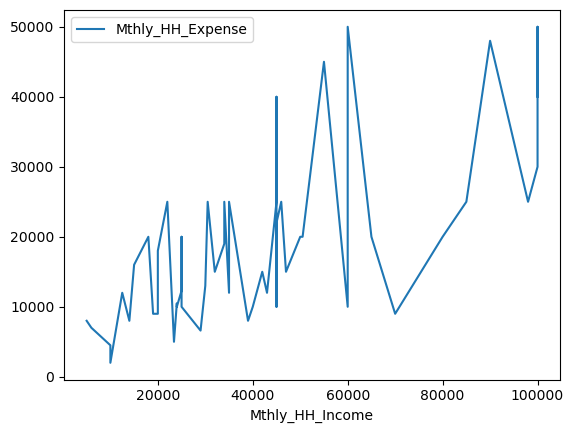

In [18]:
df.plot(x='Mthly_HH_Income',y='Mthly_HH_Expense')

In [19]:
df['No_of_Earning_Members'].value_counts()

No_of_Earning_Members
1    33
2    12
3     4
4     1
Name: count, dtype: int64

<Axes: xlabel='No_of_Earning_Members'>

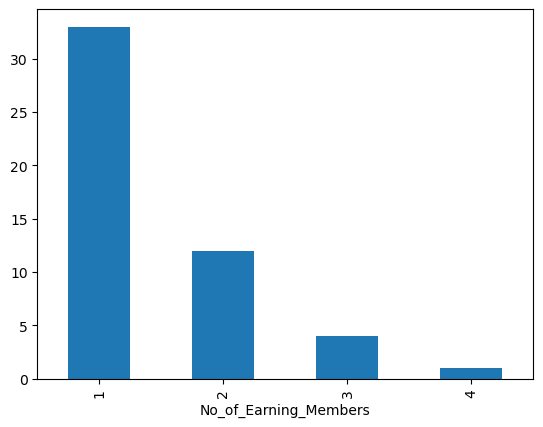

In [20]:
df['No_of_Earning_Members'].value_counts().plot(kind='bar')

### Standard Deviation

In [21]:
pd.DataFrame(df.iloc[:,0:5].std().to_frame()).T #first four columns

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income
0,26097.908979,12090.216824,1.517382,6241.434948,320135.792123


### Variance

In [22]:
pd.DataFrame(df.iloc[:,0:5].var()).T

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income
0,6.811009e+08,1.461733e+08,2.302449,3.895551e+07,1.024869e+11


-     Suppose you have option to invest in Stock A or Stock B. The stocks have different expected returns and standard deviations. The expected return of Stock A is 15% and Stock B is 10%. Standard Deviation(risk) of the returns of these stocks is 10% and 5% respectively.
-     Which is better investment?

-     let's Calculate Coefficient
-     =StandardDeviation/Returns

In [23]:
coeff_stockA=10/15
coeff_stockA

0.6666666666666666

In [24]:
coeff_stockB=5/10
coeff_stockB

0.5

-     Since Stock B has a lower risk coefficient, it appears to be the less risky option. However, Stock A offers a higher expected return.